In [6]:
import pandas as pd

# Load data (replace with your actual file path)
df = pd.read_csv('../data/benin-malanville.csv')

# Overview
print(df.head())
print(df.info())


          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
<class 'pandas.core.

In [7]:
print(df.describe())
print(df.isna().sum())

# Columns with >5% missing:
missing_percent = df.isna().mean() * 100
print(missing_percent[missing_percent > 5])


                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.2000

In [8]:
from scipy.stats import zscore

cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

df_z = df[cols].apply(zscore)
outliers = (df_z.abs() > 3).any(axis=1)

print(f"Number of outliers: {outliers.sum()}")


Number of outliers: 7740


In [9]:
for col in cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

df_clean = df[~outliers]


C:\Users\Dawa Cloud\AppData\Local\Temp\ipykernel_13712\1125379544.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
C:\Users\Dawa Cloud\AppData\Local\Temp\ipykernel_13712\1125379544.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

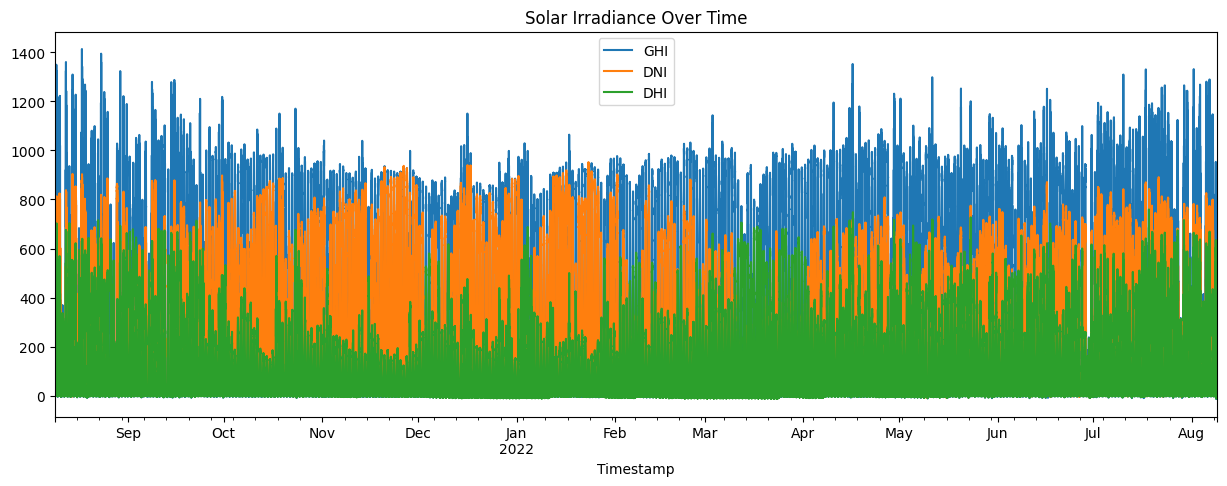

In [10]:
import matplotlib.pyplot as plt

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

df[['GHI', 'DNI', 'DHI']].plot(figsize=(15,5))
plt.title("Solar Irradiance Over Time")
plt.show()


                ModA        ModB
Cleaning                        
0         236.524253  228.816071
1         307.229278  301.972165


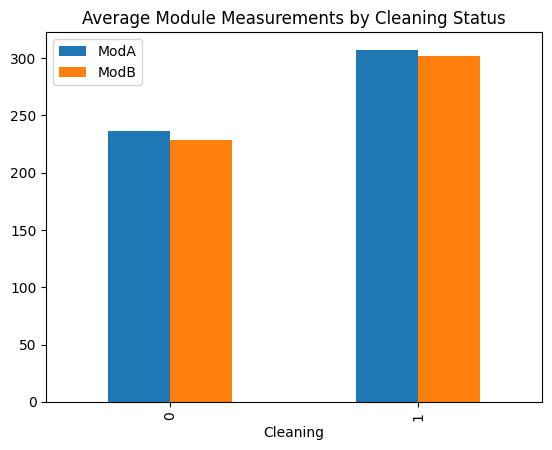

In [11]:
cleaning_group = df.groupby('Cleaning')[['ModA', 'ModB']].mean()
print(cleaning_group)
cleaning_group.plot(kind='bar')
plt.title('Average Module Measurements by Cleaning Status')
plt.show()


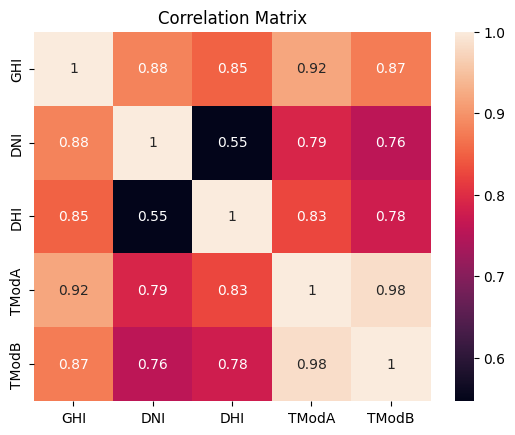

In [12]:
import seaborn as sns

corr = df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
sns.heatmap(corr, annot=True)
plt.title("Correlation Matrix")
plt.show()


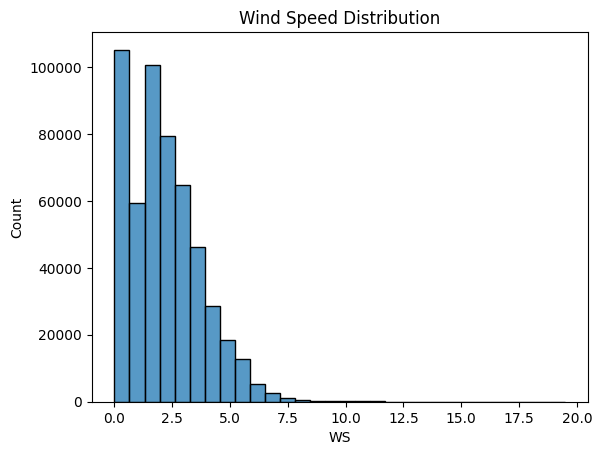

In [13]:
sns.histplot(df['WS'], bins=30)
plt.title("Wind Speed Distribution")
plt.show()


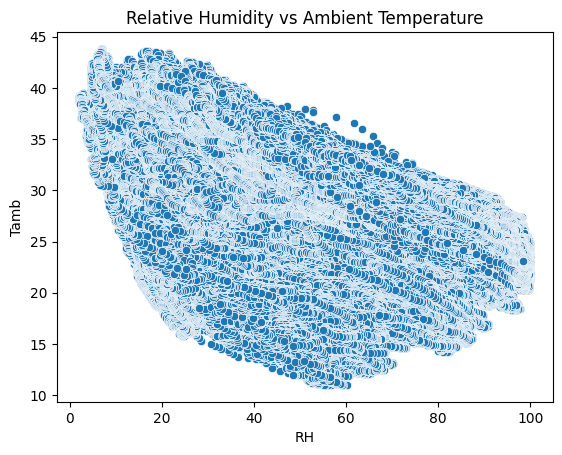

In [14]:
sns.scatterplot(x='RH', y='Tamb', data=df)
plt.title("Relative Humidity vs Ambient Temperature")
plt.show()


In [16]:
df_clean.to_csv('../data/benin_clean.csv', index=False)
